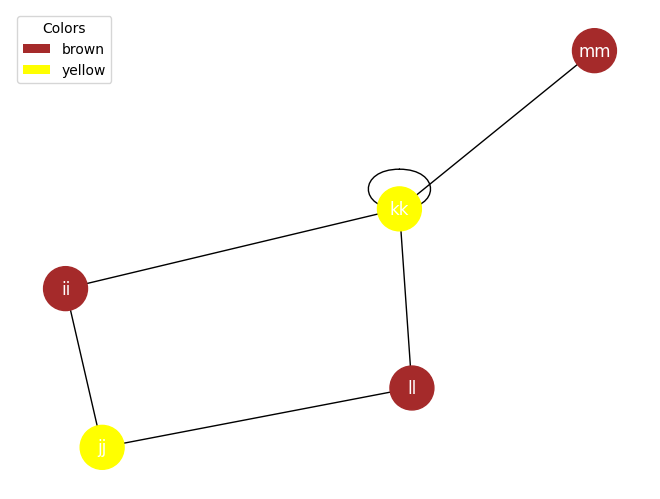

In [1]:


import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
G = nx.Graph()
regions = ['ii', 'jj', 'kk', 'll', 'mm']
G.add_nodes_from(regions)
edges = [('ii', 'jj'), ('ii', 'kk'), ('kk', 'kk'), ('jj', 'll'), ('kk', 'll'), ('kk', 'mm')]
G.add_edges_from(edges)
colors = ['yellow', 'brown', 'blue', 'yellow']
def greedy_coloring(graph, colors):
    color_map = {}
    for node in graph.nodes():
        available_colors = set(colors)
        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                available_colors.discard(color_map[neighbor])
        color_map[node] = available_colors.pop()
    return color_map
color_map = greedy_coloring(G, colors)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=[color_map[node] for node in G.nodes()], with_labels=True, node_size=1000, font_color='white')
legend_elements = [Patch(facecolor=color, label=f'{color}') for color in set(color_map.values())]
plt.legend(handles=legend_elements, title="Colors")
plt.show()